In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
glass_data = pd.read_csv("/content/glass.csv")
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [11]:
glass_data.shape

(214, 10)

In [4]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
glass_data.duplicated().sum()

1

In [9]:
glass_data.drop_duplicates()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [13]:
glass_data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [18]:
glass_data.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
68,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
170,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.00,0.00,5
43,1.52210,13.73,3.84,0.72,71.76,0.17,9.74,0.00,0.00,1
147,1.51610,13.33,3.53,1.34,72.67,0.56,8.33,0.00,0.00,3
14,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00,1
72,1.51593,13.09,3.59,1.52,73.10,0.67,7.83,0.00,0.00,2
36,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00,1
193,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08,7
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1
87,1.51645,13.40,3.49,1.52,72.65,0.67,8.08,0.00,0.10,2


Text(0.5, 1.0, 'Elements')

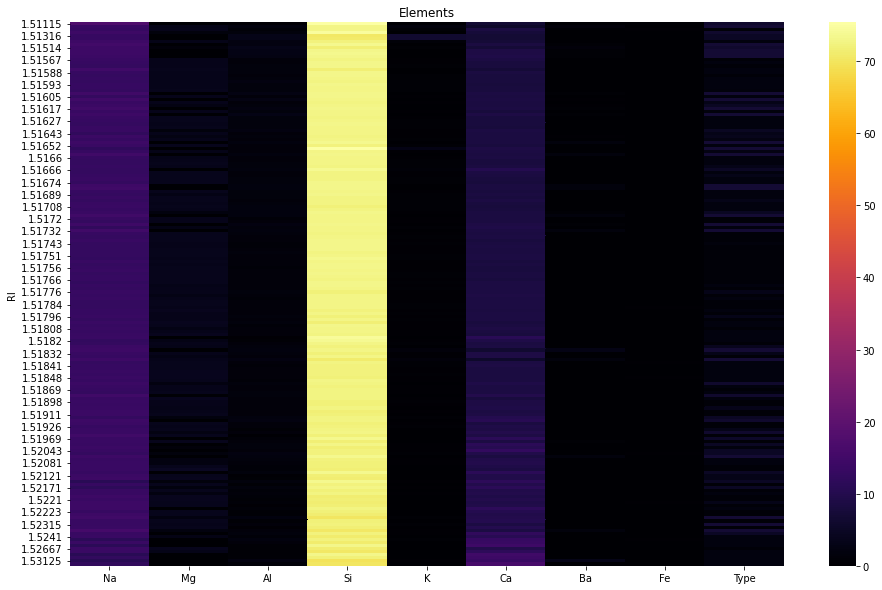

In [23]:
#Generating Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
data_temp = glass_data
data_temp = data_temp.groupby(by='RI').mean()  # RI Referactive Index
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(data_temp, cmap="inferno")
ax = plt.gca()
ax.set_title("Elements")

Text(0.5, 1.0, 'HeatMap of Elements')

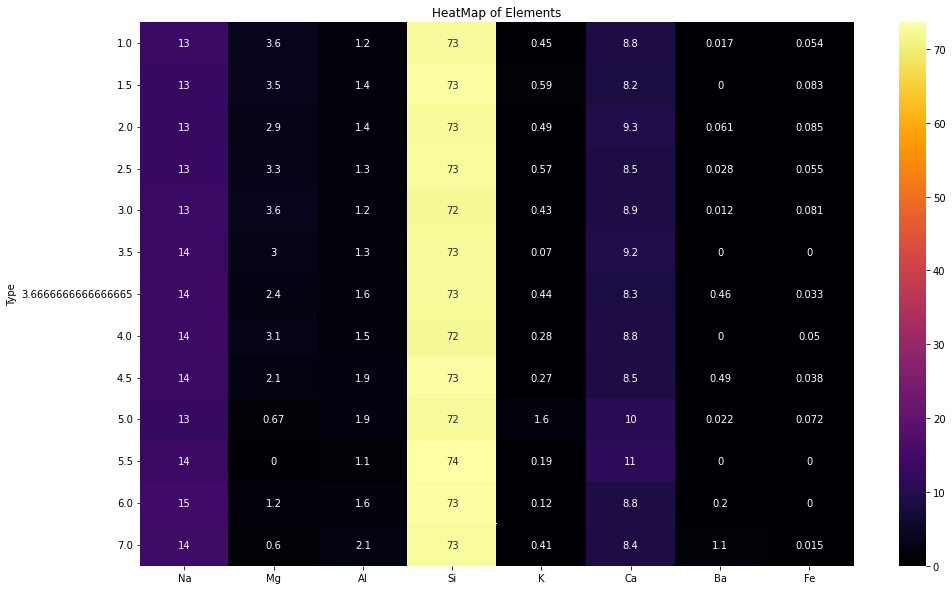

In [25]:
data_temp = data_temp.groupby(by='Type').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(data_temp, annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Elements")

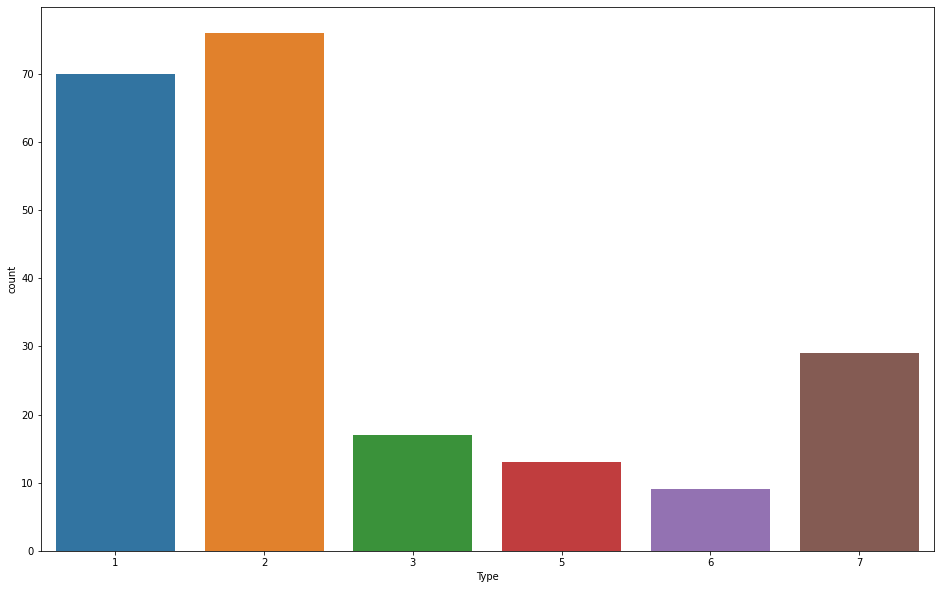

In [26]:
sns.countplot(x = 'Type', data = glass_data)

In [ ]:
#In above data we found that the si is not plot in sns countplot graph as it missing the type 4 

In [27]:
# Splitting data into X and y
X = glass_data.drop('Type', axis = 1)
y = glass_data['Type']

In [28]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [29]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

x=glass_data.iloc[:,1:9]
y=glass_data['Type']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [32]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (149, 9)
Shape of x_test:  (65, 9)
Shape of y_train:  (149,)
Shape of y_test:  (65,)


#Building KNN Model

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

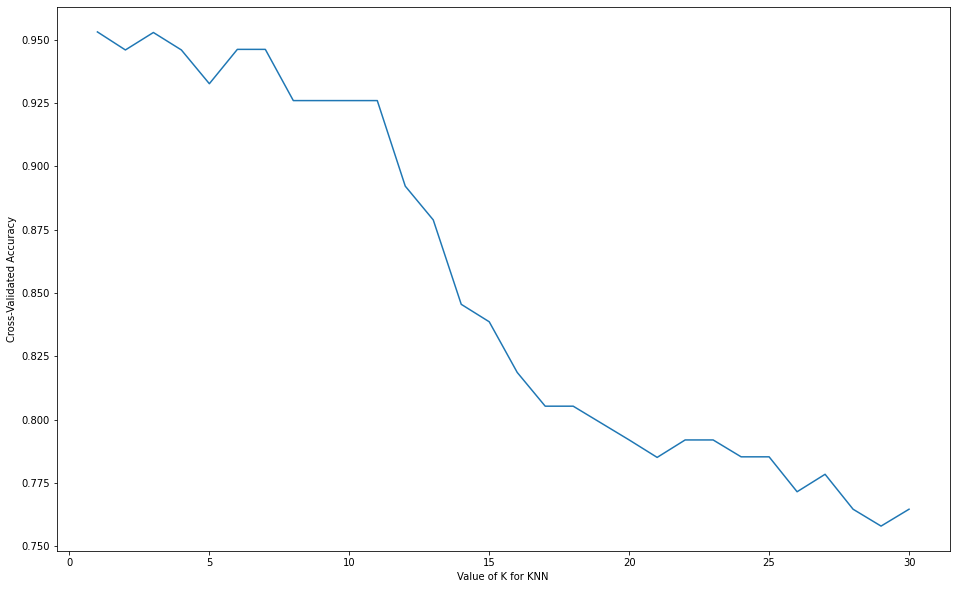

In [36]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    train_scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(train_scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [37]:
model = KNeighborsClassifier(n_neighbors=5)

In [38]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [39]:
print('Model score for n_neighbors =5 is -->',model.score(x_test, y_test))

Model score for n_neighbors =5 is --> 0.9076923076923077


#Plot Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
cm = confusion_matrix(y_test, pred)
cm

array([[19,  0,  0,  0,  0,  0],
       [ 3, 20,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  5,  1,  0],
       [ 0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  1,  9]])

In [42]:
pred_glass_data = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred})
pred_glass_data.head()

,Actual,Predicted
9,1,1
197,7,7
66,1,1
191,7,7
117,2,2


Text(42.0, 0.5, 'Truth')

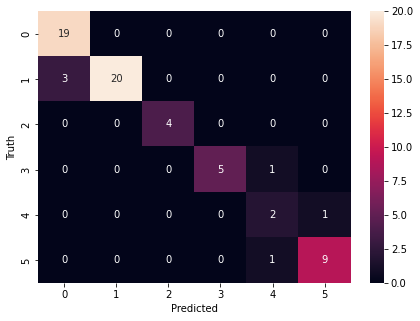

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Grid Search for Algorithm Tuning

In [44]:
# Grid Search for Algorithm Tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [46]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [47]:
print(grid.best_score_)
print(grid.best_params_)

0.953103448275862
{'n_neighbors': 1}


In [48]:
# Get score for different values of n
k_list = np.arange(1, 50, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    score = cross_val_score(knn,x_train, y_train,cv=3)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

print("Mean Scores:")
print(mean_scores)
print("Error Rate:")
print(error_rate)

Mean Scores:
[0.9461224489795917, 0.9593197278911565, 0.9593197278911565, 0.925578231292517, 0.8922448979591836, 0.8450340136054422, 0.8115646258503402, 0.8115646258503402, 0.7912925170068027, 0.7710204081632653, 0.7779591836734694, 0.7711564625850341, 0.7712925170068027, 0.7644897959183674, 0.7644897959183674, 0.7644897959183674, 0.7578231292517007, 0.7578231292517007, 0.7376870748299319, 0.7175510204081633, 0.6707482993197278, 0.610204081632653, 0.5836734693877551, 0.5703401360544218, 0.5565986394557824]
Error Rate:
[0.015384615384615385, 0.06153846153846154, 0.09230769230769231, 0.1076923076923077, 0.07692307692307693, 0.09230769230769231, 0.1076923076923077, 0.15384615384615385, 0.15384615384615385, 0.18461538461538463, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.24615384615384617, 0.26153846153846155, 0.24615384615384617, 0.26153846153846155, 0.26153846153846155, 0.26153846153846155, 0.27692307692307694, 0.276923076923

#Visualizing model performance for different numbers of K

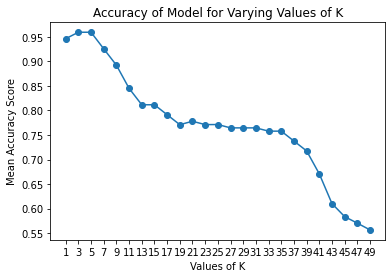

In [49]:
# Plot n values and average accuracy scores
plt.plot(k_list,mean_scores, marker='o')

# Added titles and adjust dimensions
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

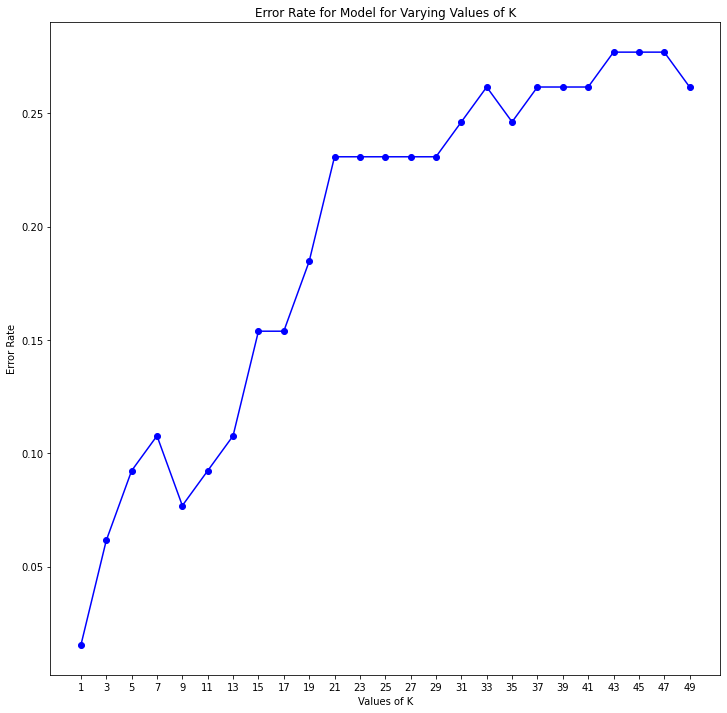

In [50]:
# Plot n values and average accuracy scores
plt.plot(k_list,error_rate, color='b', marker = 'o')

# Added titles and adjust dimensions
plt.title('Error Rate for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12, 6) 

plt.show()

In [51]:
glass_data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

# By using K Means Algorithum

In [54]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(glass_data)

KMeans(n_clusters=3, random_state=42)

In [55]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [56]:
#Assign clusters to the data set
glass_data['labels'] = clusters_new.labels_

In [57]:
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,labels
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,0


In [58]:
glass_data2=glass_data.groupby('labels').agg(['mean']).reset_index()    # Finding out the mean of data and reseting the the index

In [59]:
glass_data2

,labels,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.517077,14.297955,0.761364,2.029091,72.833864,0.587727,8.640455,0.740909,0.020455,6.522727
1,1,1.518095,13.242961,3.517829,1.288355,72.624276,0.495066,8.620395,0.011250,0.064474,1.651316
2,2,1.523800,12.624444,0.348889,1.338889,72.428889,0.292222,12.572778,0.175000,0.083333,3.166667


# Vizualizing using SilehoutteVisualizer

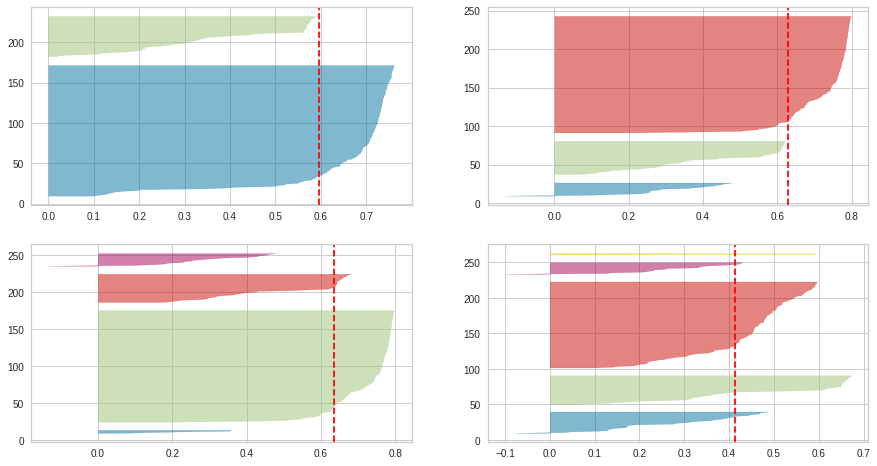

In [60]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(glass_data) 

#Vizualizing using Elbow Method of Kmeans

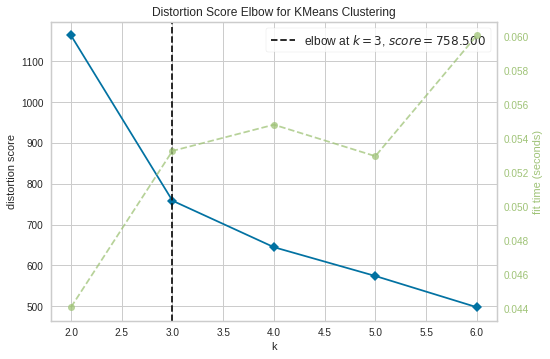

In [61]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(KMeans(),k=6)
visualizer.fit(glass_data)
visualizer.show()

#Conclusion --Model score for n_neighbors =5 is --> 0.9076923076923077
and by using elbow methos we found the distortion score for k=3 is 758.5 and also by using SilhouetteVisualizer we found the score is near about 0.6
KNN is a versatile algorithm and can be used with data that has a variety of different sized dimensions.